# Peer-graded Assignment: Analyzing Historical Stock/Revenue Data and Building a Dashboard
Author: Rainer Aue

As a data scientist working for an investment firm, you will extract the revenue data for Tesla and GameStop and build a dashboard to compare the price of the stock vs the revenue. 

Full Points: Working code that yields correct results

You will be graded on the dashboards displaying the specified data and the screenshots you took during the final project lab questions. There are 12 possible points for this assignment. Here is the breakdown:

- Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points
- Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points  
- Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points
- Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points
- Question 5 - Tesla Stock and Revenue Dashboard - 2 Points
- Question 6 - GameStop Stock and Revenue Dashboard- 2 Points
- Question 7 - Sharing your Assignment Notebook - 2 Points

For each problem points will be awarded as follows:

Full Points: Working code that yields correct results
Partial Points: Partially correct code or results
No Points: Did not attempt the problem or did not upload any solution

## Preparation

In [2]:
# all needed imports
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [6]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Question 1
Extracting Tesla Stock Data Using yfinance - 2 Points

In [11]:
tesla=yf.Ticker('TSLA')
tesla_data=tesla.history(period='20y') # 20y because, local python version doesn't work w/ 'max'
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2
Extracting Tesla Revenue Data Using Webscraping - 1 Points

In [31]:
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
html_data=requests.get(url).text
soup=BeautifulSoup(html_data, parser='html5lib')

read_html_pandas_data = pd.read_html(str(soup))
tesla_revenue= read_html_pandas_data[1]
tesla_revenue.columns=['Date','Revenue']

tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace('$',"").str.replace(',',"")

tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# show latest 5 revenue entries:
tesla_revenue.tail(5)


,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


## Question 3
Extracting GameStop Stock Data Using yfinance - 2 Points

In [10]:
gamestop=yf.Ticker('GME')
gme_data=gamestop.history(period='20y')  # 20y because, local python version doesn't work w/ 'max'
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2004-07-06 00:00:00-04:00,1.251497,1.266646,1.226248,1.241397,1435200,0.0,0.0
1,2004-07-07 00:00:00-04:00,1.235506,1.262438,1.227090,1.227090,2023200,0.0,0.0
2,2004-07-08 00:00:00-04:00,1.227090,1.240556,1.216149,1.237189,2152000,0.0,0.0
3,2004-07-09 00:00:00-04:00,1.232981,1.248130,1.209416,1.245605,1757600,0.0,0.0
4,2004-07-12 00:00:00-04:00,1.237189,1.262438,1.222881,1.262438,1244000,0.0,0.0


## Question 4
Extracting GameStop Revenue Data Using Webscraping - 1 Points

In [32]:
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
html_data_2=requests.get(url).text

soup=BeautifulSoup(html_data_2, parser='html5lib')

read_html_pandas_data = pd.read_html(str(soup))
gme_revenue= read_html_pandas_data[1]
gme_revenue.columns=['Date','Revenue']
gme_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

# show latest 5 revenue entries:
gme_revenue.tail()


,Date,Revenue
48,2008-04-30,31
49,2008-01-31,28
50,2007-10-31,21
52,2007-04-30,46
53,2007-01-31,27


## Question 5
Tesla Stock and Revenue Dashboard - 2 Points

<Axes: title={'center': 'TESLA - Revenue'}, xlabel='Date', ylabel='$US Millions'>

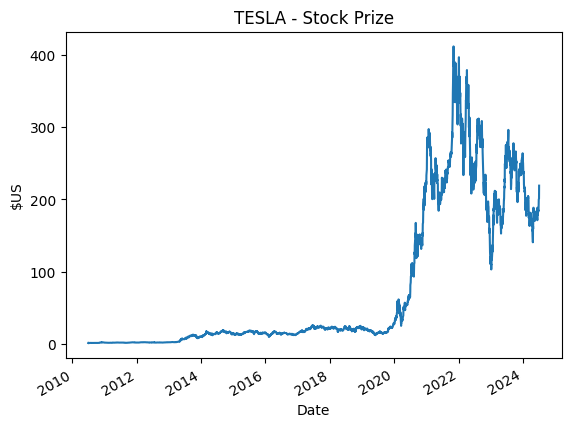

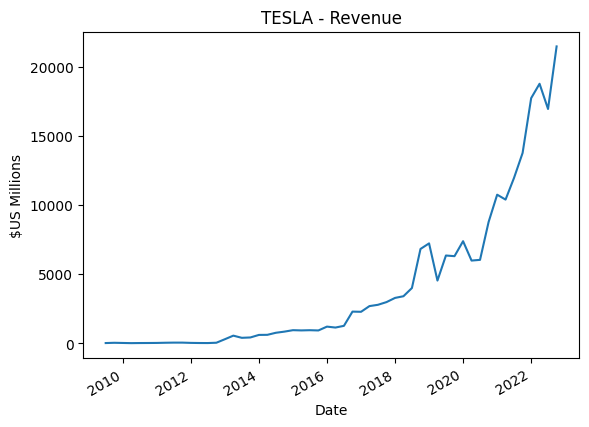

In [29]:
# used another apporach based on my own ideas instead of the give function 'make_graph' - hope this's fine
tesla_data.plot(x='Date', y='Open', title='TESLA - Stock Prize', ylabel='$US', legend=False)

tesla_revenue['Date']=pd.to_datetime(tesla_revenue['Date'])  # converting, otherwise taken as string which leads to descend x-axis
tesla_revenue['Revenue']=tesla_revenue['Revenue'].astype(float)  # only numeric values can be plotted
tesla_revenue.plot(x='Date', y='Revenue', title='TESLA - Revenue', ylabel='$US Millions', legend=False)

## Question 6
GameStop Stock and Revenue Dashboard- 2 Points

<Axes: title={'center': 'GAMESTOP - Revenue'}, xlabel='Date', ylabel='$US Millions'>

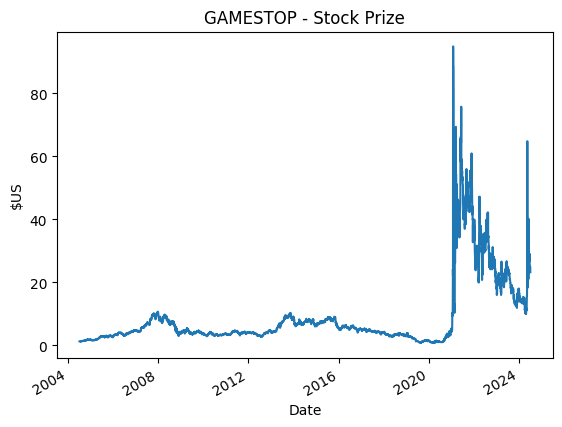

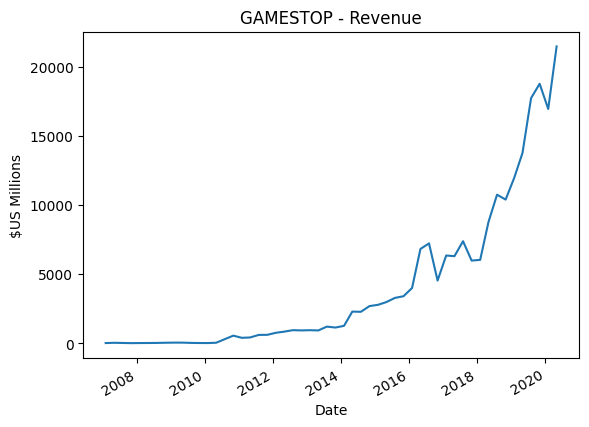

In [30]:
# used another apporach based on my own ideas instead of the give function 'make_graph' - hope this's fine
gme_data.plot(x='Date', y='Open', title='GAMESTOP - Stock Prize', ylabel='$US', legend=False)

gme_revenue['Date']=pd.to_datetime(gme_revenue['Date'])  # converting, otherwise taken as string which leads to descend x-axis
gme_revenue['Revenue']=gme_revenue['Revenue'].astype(float)  # only numeric values can be plotted
gme_revenue.plot(x='Date', y='Revenue', title='GAMESTOP - Revenue', ylabel='$US Millions', legend=False)

## Question
Sharing your Assignment Notebook - 2 Points